In [1]:
import pandas as pd
import numpy as np
from matplotlib import rc
import matplotlib.pyplot as plt

rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

자릿수 평균 보는 방법 - 김도영이 제시한 방법 중 일부

박근혜 : 차이가 좀 많이 나야됨 (chi-square 분포 에러가 높아서..)

In [177]:
0.1190*0 + 0.1265 * 1 +  0.1238 * 2 +  0.1173*3 +0.1098*4 + 0.1031*5 + 0.0901*6 +  0.0793*7 + 0.0674*8 + 0.0637*9

3.8889

문재인 : 차이 좀 덜나야됨

In [178]:
0.1169*1+0.1185*2+0.1124*3+0.1096*4+0.1004*5+0.0957*6+0.0823*7+0.0788*8+0.0668*9

4.0134

만족하는거 확인

In [5]:
data = pd.read_excel('19대_투표소별.xlsx')
data

시도명  구시군명   읍면동명      투표구명  선거인수   투표수  더불어민주당\n문재인  자유한국당\n홍준표  \
0        서울특별시   종로구  청운효자동    관내사전투표  1784  1784          819         331   
1        서울특별시   종로구  청운효자동  청운효자동제1투  2493  1682          664         451   
2        서울특별시   종로구  청운효자동  청운효자동제2투  2644  1986          793         509   
3        서울특별시   종로구  청운효자동  청운효자동제3투  2457  1843          833         386   
4        서울특별시   종로구    사직동    관내사전투표  2008  2008          890         447   
...        ...   ...    ...       ...   ...   ...          ...         ...   
17450  제주특별자치도  서귀포시    중문동    중문동제4투   467   319          121          80   
17451  제주특별자치도  서귀포시    예래동    관내사전투표   359   359          161          63   
17452  제주특별자치도  서귀포시    예래동    예래동제1투   693   446          182          95   
17453  제주특별자치도  서귀포시    예래동    예래동제2투  1452   899          375         193   
17454  제주특별자치도  서귀포시    예래동    예래동제3투   363   259          107          52   

       국민의당\n안철수  바른정당\n유승민  ...  경제애국당\n오영국  국민대통합당\n장성민  늘푸른한국당\n이재오  \
0            352        120  ...           0            3            0   
1            342        107  ...           0            5            0   
2            382        144  ...           0            0            0   
3            362        104  ...           0            3            1   
4            359        134  ...           0            9            0   
...          ...        ...  ...         ...          ...          ...   
17450         72         20  ...           0            0            0   
17451         83         18  ...           2            1            0   
17452         96         24  ...           1            1            0   
17453        199         55  ...           0            1            0   
17454         67         19  ...           0            0            3   

       민중연합당\n김선동  한국국민당\n이경희  홍익당\n윤홍식  무소속\n김민찬     계  무효투표수  기권수  
0               3           0         1         2  1781      3    0  
1               0           1         3         2  1677      5  811  
2               1           0         1         2  1976     10  658  
3               2           0         0         0  1839      4  614  
4               0           0         0         1  2003      5    0  
...           ...         ...       ...       ...   ...    ...  ...  
17450           1           1         0         0   317      2  148  
17451           1           0         1         1   358      1    0  
17452           0           0         0         3   444      2  247  
17453           4           0         3         1   891      8  553  
17454           0           0         0         0   258      1  104  

[17455 rows x 22 columns]

In [6]:
data_without_columns = data.drop(columns=['선거인수', '투표수', '계', '무효투표수', '기권수', '구시군명', '읍면동명', '투표구명'])
data_without_columns

시도명  더불어민주당\n문재인  자유한국당\n홍준표  국민의당\n안철수  바른정당\n유승민  정의당\n심상정  \
0        서울특별시          819         331        352        120       149   
1        서울특별시          664         451        342        107        96   
2        서울특별시          793         509        382        144       143   
3        서울특별시          833         386        362        104       143   
4        서울특별시          890         447        359        134       162   
...        ...          ...         ...        ...        ...       ...   
17450  제주특별자치도          121          80         72         20        22   
17451  제주특별자치도          161          63         83         18        27   
17452  제주특별자치도          182          95         96         24        41   
17453  제주특별자치도          375         193        199         55        59   
17454  제주특별자치도          107          52         67         19        10   

       새누리당\n조원진  경제애국당\n오영국  국민대통합당\n장성민  늘푸른한국당\n이재오  민중연합당\n김선동  \
0              1           0            3            0           3   
1              6           0            5            0           0   
2              1           0            0            0           1   
3              5           0            3            1           2   
4              1           0            9            0           0   
...          ...         ...          ...          ...         ...   
17450          0           0            0            0           1   
17451          0           2            1            0           1   
17452          1           1            1            0           0   
17453          1           0            1            0           4   
17454          0           0            0            3           0   

       한국국민당\n이경희  홍익당\n윤홍식  무소속\n김민찬  
0               0         1         2  
1               1         3         2  
2               0         1         2  
3               0         0         0  
4               0         0         1  
...           ...       ...       ...  
17450           1         0         0  
17451           0         1         1  
17452           0         0         3  
17453           0         3         1  
17454           0         0         0  

[17455 rows x 14 columns]

In [4]:
# Removing the first row from the DataFrame
data_without_columns = data_without_columns.iloc[1:]

data_without_columns

시도명  더불어민주당\n문재인  자유한국당\n홍준표  국민의당\n안철수  바른정당\n유승민  정의당\n심상정  \
1        서울특별시          664         451        342        107        96   
2        서울특별시          793         509        382        144       143   
3        서울특별시          833         386        362        104       143   
4        서울특별시          890         447        359        134       162   
5        서울특별시          520         380        298         92        76   
...        ...          ...         ...        ...        ...       ...   
17450  제주특별자치도          121          80         72         20        22   
17451  제주특별자치도          161          63         83         18        27   
17452  제주특별자치도          182          95         96         24        41   
17453  제주특별자치도          375         193        199         55        59   
17454  제주특별자치도          107          52         67         19        10   

       새누리당\n조원진  경제애국당\n오영국  국민대통합당\n장성민  늘푸른한국당\n이재오  민중연합당\n김선동  \
1              6           0            5            0           0   
2              1           0            0            0           1   
3              5           0            3            1           2   
4              1           0            9            0           0   
5              2           0            1            0           0   
...          ...         ...          ...          ...         ...   
17450          0           0            0            0           1   
17451          0           2            1            0           1   
17452          1           1            1            0           0   
17453          1           0            1            0           4   
17454          0           0            0            3           0   

       한국국민당\n이경희  홍익당\n윤홍식  무소속\n김민찬  
1               1         3         2  
2               0         1         2  
3               0         0         0  
4               0         0         1  
5               0         0         1  
...           ...       ...       ...  
17450           1         0         0  
17451           0         1         1  
17452           0         0         3  
17453           0         3         1  
17454           0         0         0  

[17454 rows x 14 columns]

In [7]:
data_without_columns.to_csv('19대_filtered3.csv', index=False)

### 2nd digit으로 봤을 때의 각 후보 benford rule 만족 테스팅

/var/folders/8l/d0_bj06x2czf46y6_p5zswgr0000gn/T/ipykernel_4584/6543749.py:8: RuntimeWarning: invalid value encountered in true_divide
  return frequencies / sum(frequencies)  # Normalize the frequencies


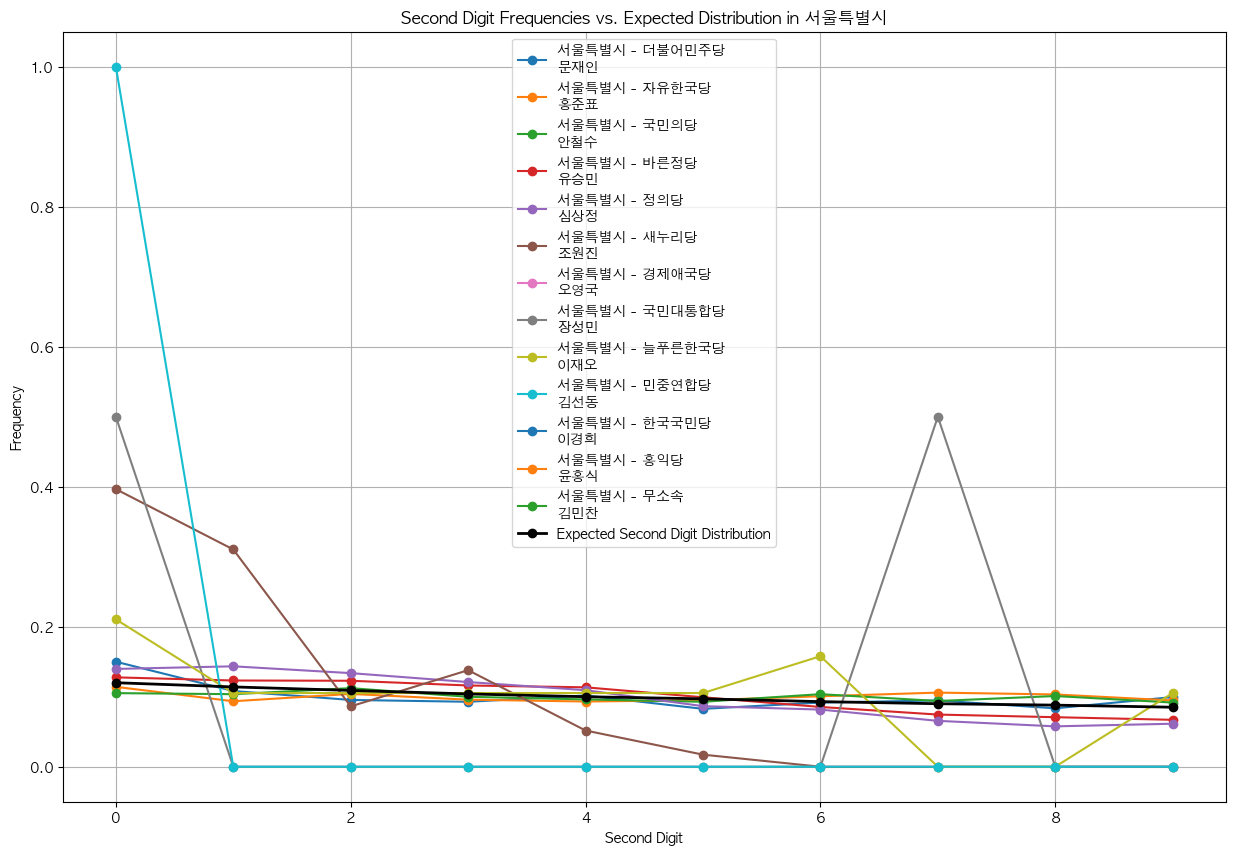

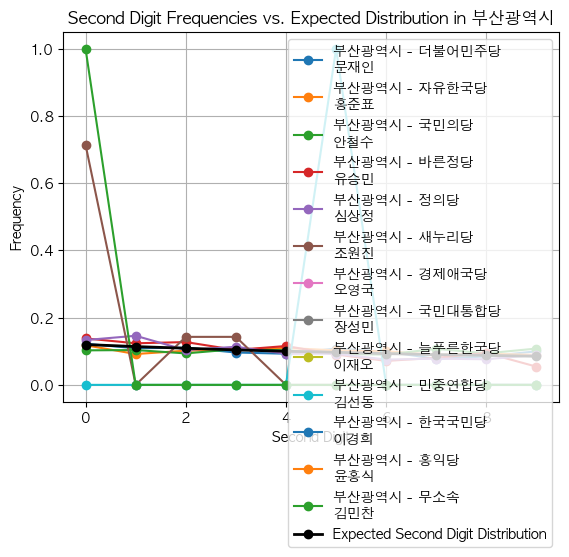

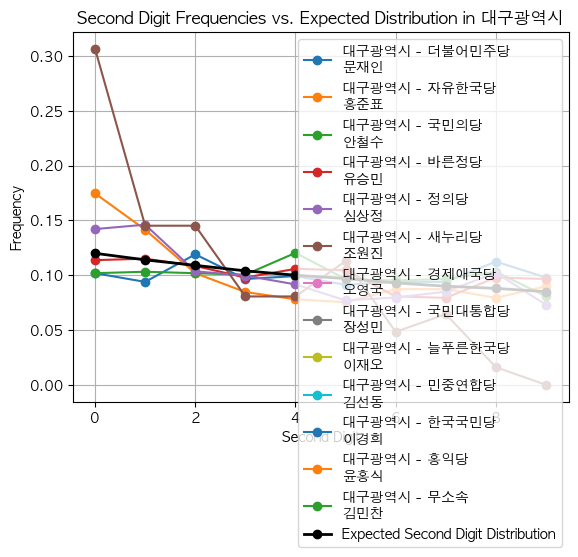

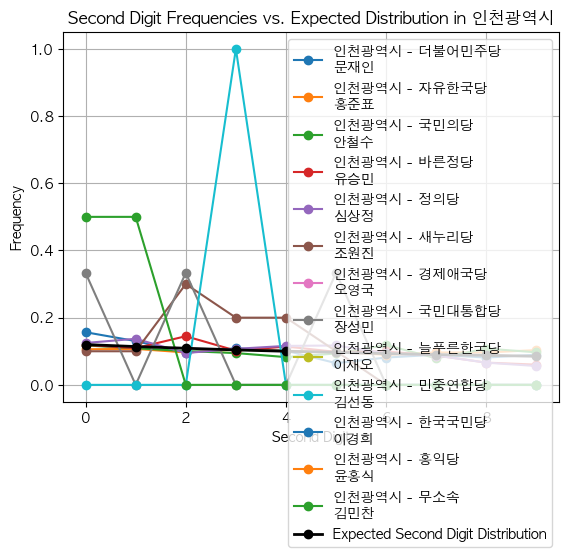

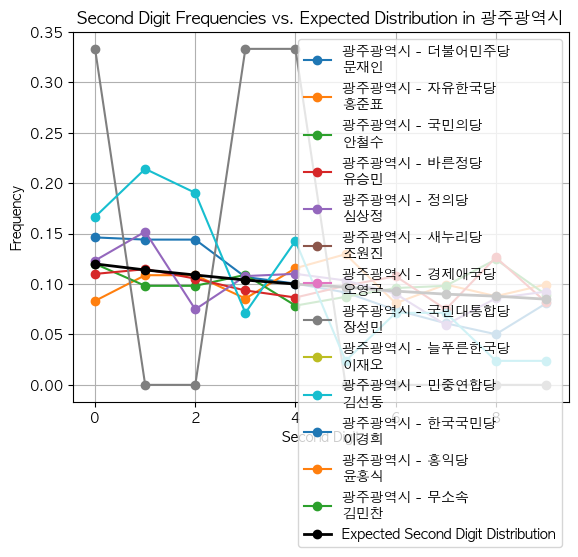

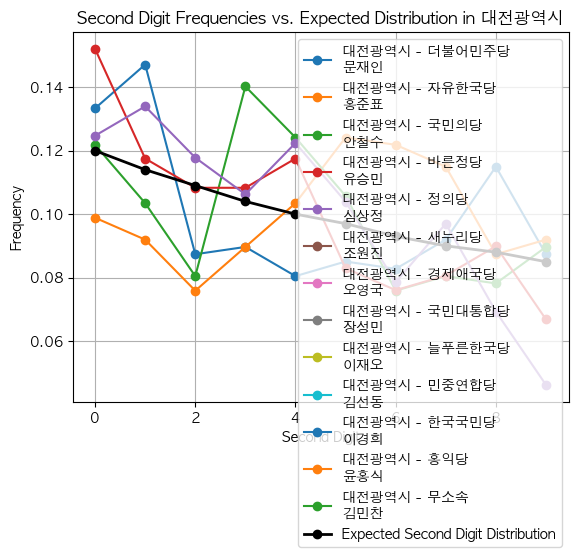

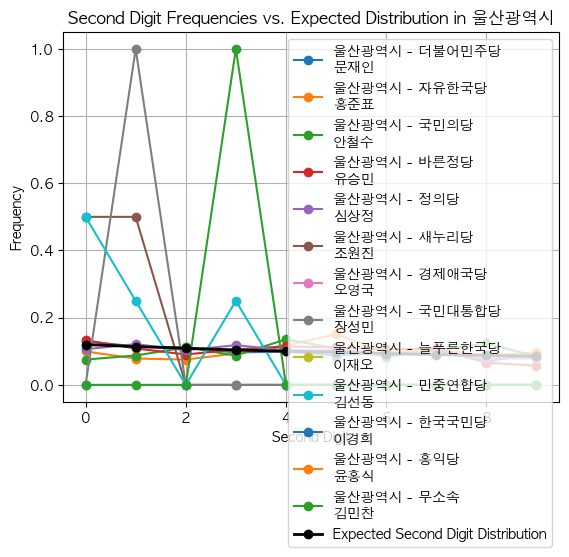

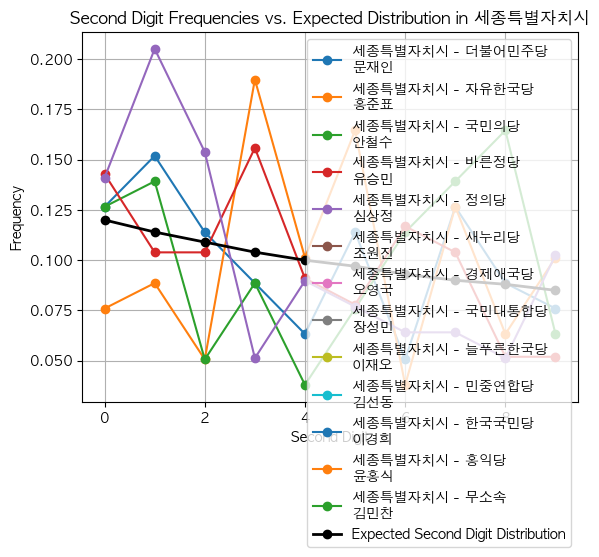

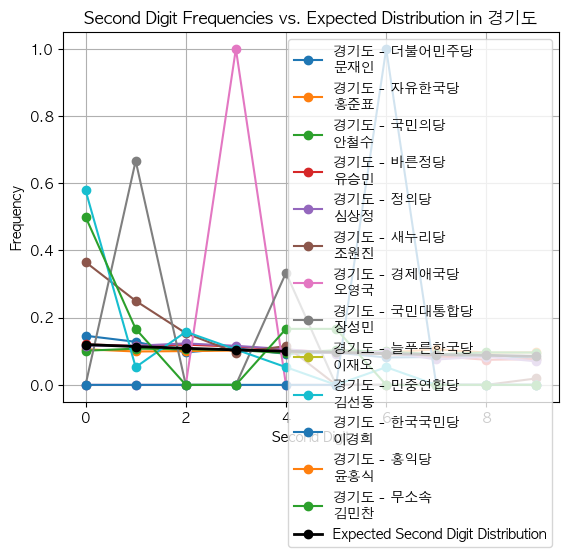

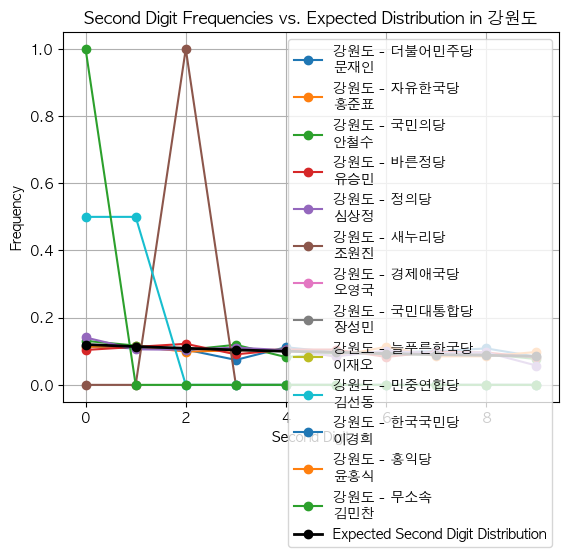

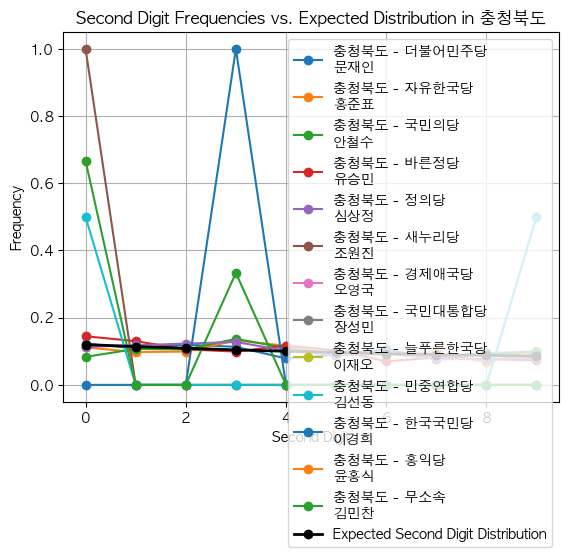

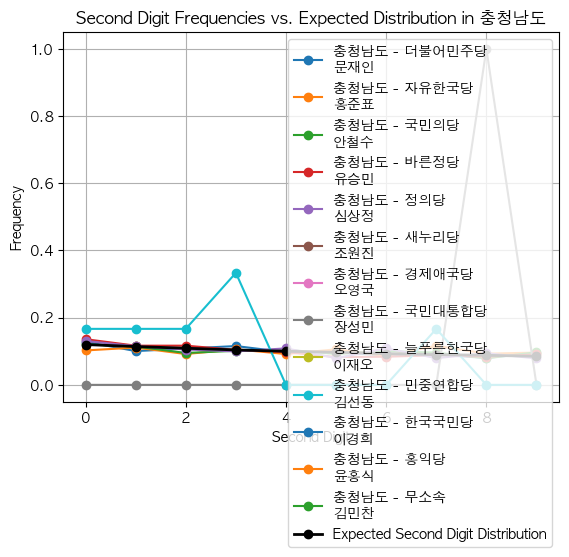

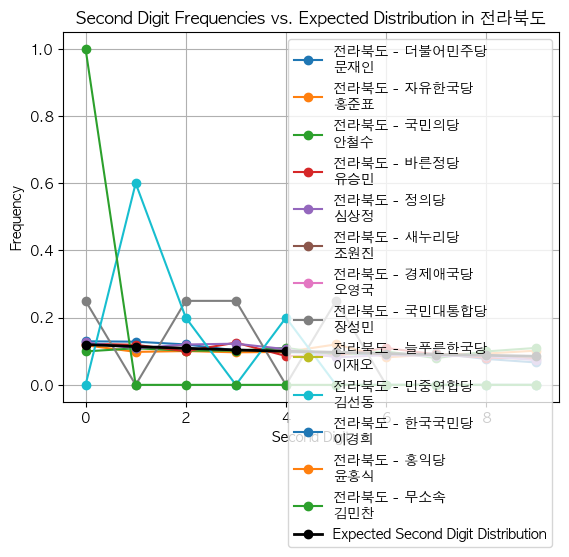

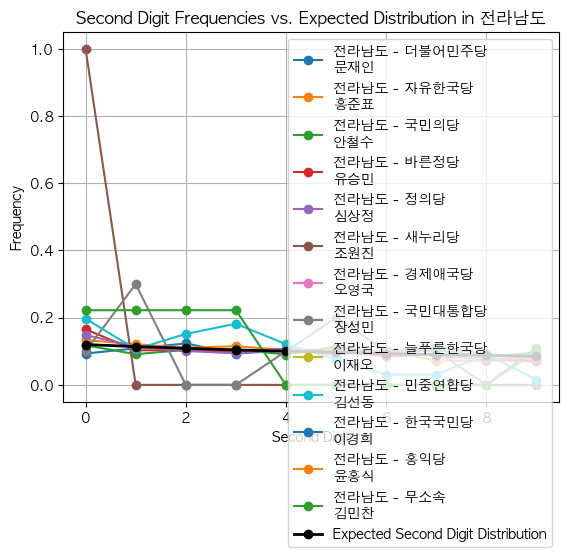

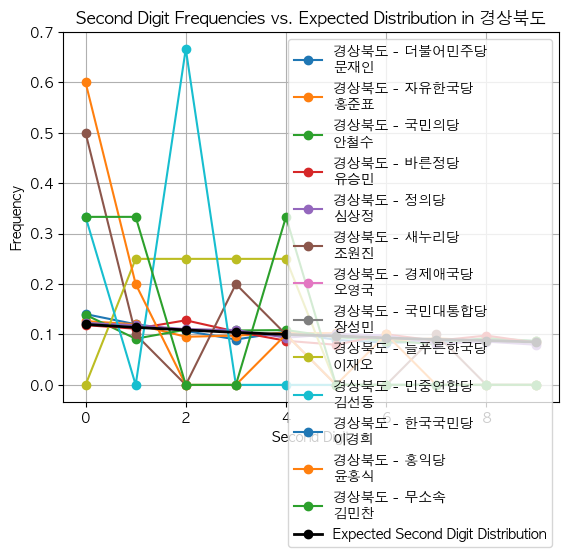

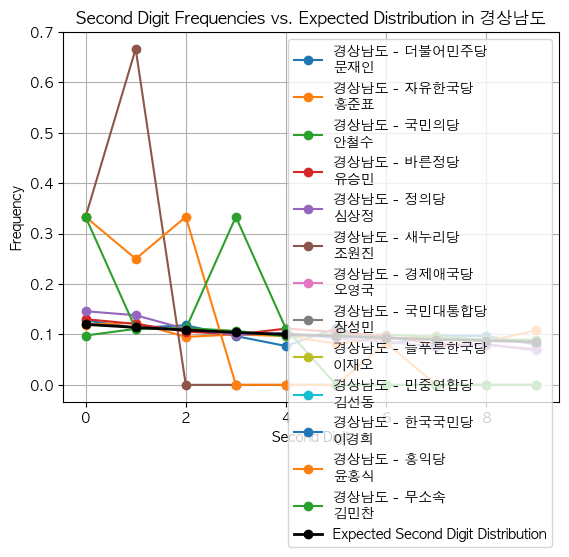

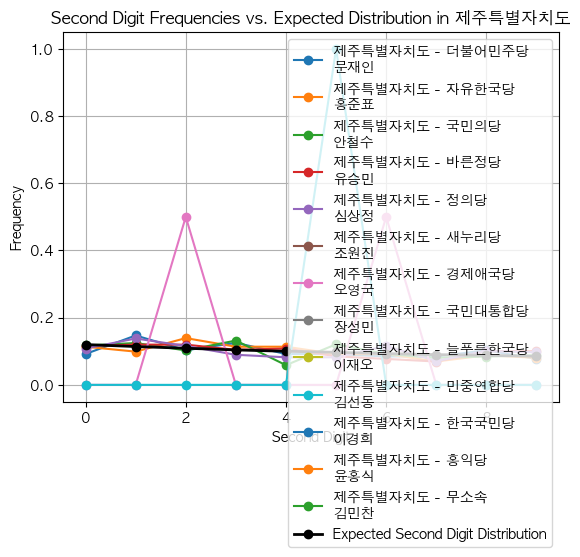

In [8]:
# Function to calculate the second digit frequency
def second_digit_frequencies(numbers):
    frequencies = np.zeros(10)  # Array to hold frequencies for digits 0 through 9
    for number in numbers:
        if number >= 10:  # Ensure the number has at least two digits
            second_digit = int(str(number)[1])  # Extract the second digit
            frequencies[second_digit] += 1
    return frequencies / sum(frequencies)  # Normalize the frequencies

second_digit_distribution = [0.120, 0.114,0.109,0.104,0.100,0.097,0.093,0.090,0.088,0.085]

# Initialize a figure for plotting
plt.figure(figsize=(15, 10))

# Group data by '시도' (province) and plot the second digit frequency for each candidate
for province in data_without_columns['시도명'].unique():
    province_data = data_without_columns[data_without_columns['시도명'] == province]

    # Plotting the second digit frequency for each candidate in the province
    for column in data_without_columns.columns[1:]:
        frequencies = second_digit_frequencies(province_data[column])
        plt.plot(range(0, 10), frequencies, '-o', label=f"{province} - {column}")

    # Plotting the expected second digit distribution for comparison
    plt.plot(range(0, 10), second_digit_distribution, '-o', label='Expected Second Digit Distribution', color='black', linewidth=2)

    # Adding labels and title to the plot
    plt.xlabel('Second Digit')
    plt.ylabel('Frequency')
    plt.title(f'Second Digit Frequencies vs. Expected Distribution in {province}')
    plt.legend()
    plt.grid(True)
    plt.show()  # Show the plot for each province

### 상위 3명의 후보만 보기로 함 - 각 지역별 (광역시 + 도)

Digit Frequencies for 서울특별시 - 더불어민주당
문재인: [0.15001871 0.10811822 0.09539843 0.09277965 0.10175832 0.08267864
 0.09165731 0.09465021 0.08342686 0.09951366]
Digit Frequencies for 서울특별시 - 자유한국당
홍준표: [0.114104   0.09352787 0.10400299 0.09577254 0.09315376 0.09502432
 0.10063599 0.10587355 0.10325477 0.09465021]
Digit Frequencies for 서울특별시 - 국민의당
안철수: [0.10512533 0.10362888 0.11223345 0.09988777 0.09614665 0.09277965
 0.10362888 0.09390198 0.1010101  0.09165731]


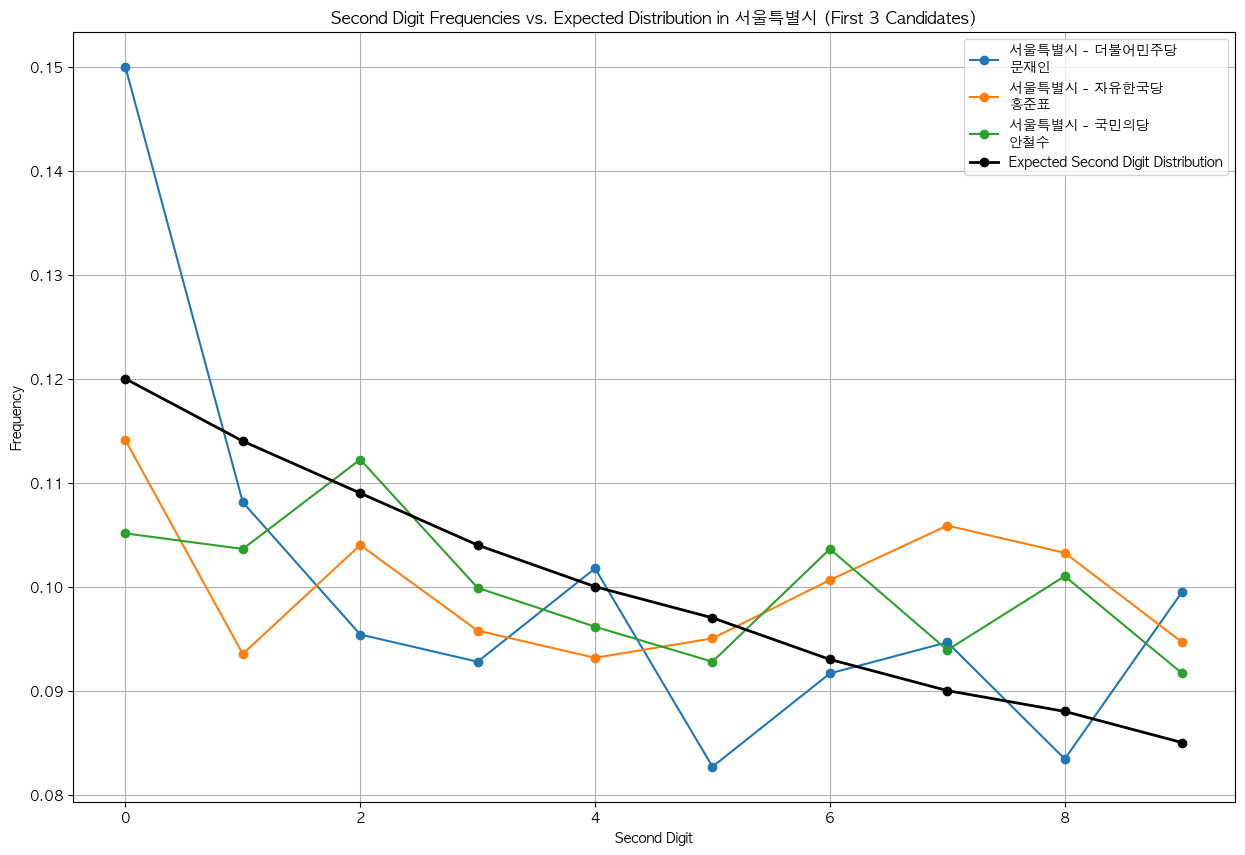

Digit Frequencies for 부산광역시 - 더불어민주당
문재인: [0.12241224 0.10891089 0.11071107 0.09630963 0.09270927 0.1080108
 0.0990099  0.07740774 0.08460846 0.09990999]
Digit Frequencies for 부산광역시 - 자유한국당
홍준표: [0.11791179 0.09180918 0.10171017 0.10531053 0.10981098 0.10261026
 0.09990999 0.08910891 0.09270927 0.08910891]
Digit Frequencies for 부산광역시 - 국민의당
안철수: [0.1027027  0.1036036  0.09369369 0.10630631 0.1027027  0.09189189
 0.09009009 0.10720721 0.09369369 0.10810811]


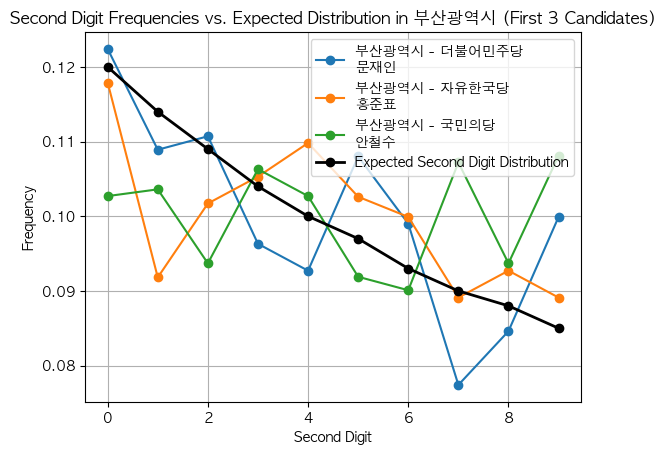

Digit Frequencies for 대구광역시 - 더불어민주당
문재인: [0.10185185 0.09391534 0.11904762 0.09656085 0.09920635 0.09126984
 0.09391534 0.09391534 0.11243386 0.0978836 ]
Digit Frequencies for 대구광역시 - 자유한국당
홍준표: [0.17460317 0.14153439 0.10185185 0.08465608 0.07804233 0.07539683
 0.08730159 0.08730159 0.07936508 0.08994709]
Digit Frequencies for 대구광역시 - 국민의당
안철수: [0.10185185 0.1031746  0.10185185 0.1005291  0.12037037 0.09656085
 0.0952381  0.09656085 0.1031746  0.08068783]


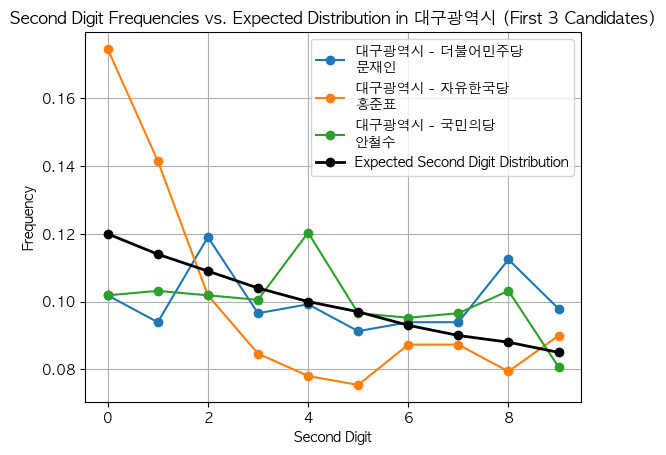

Digit Frequencies for 인천광역시 - 더불어민주당
문재인: [0.15669856 0.13038278 0.09569378 0.10885167 0.10167464 0.0645933
 0.08133971 0.08971292 0.08133971 0.08971292]
Digit Frequencies for 인천광역시 - 자유한국당
홍준표: [0.10595238 0.10714286 0.09642857 0.1047619  0.10119048 0.09880952
 0.08928571 0.09642857 0.09642857 0.10357143]
Digit Frequencies for 인천광역시 - 국민의당
안철수: [0.11736527 0.10898204 0.1005988  0.09461078 0.08263473 0.09341317
 0.11856287 0.07904192 0.10778443 0.09700599]


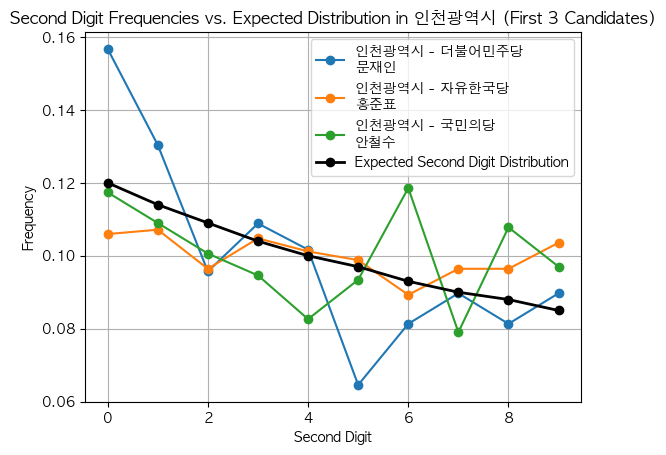

Digit Frequencies for 광주광역시 - 더불어민주당
문재인: [0.14628821 0.1441048  0.1441048  0.1069869  0.10043668 0.09170306
 0.07423581 0.06113537 0.05021834 0.08078603]
Digit Frequencies for 광주광역시 - 자유한국당
홍준표: [0.08333333 0.1087963  0.1087963  0.08564815 0.11574074 0.12962963
 0.08101852 0.09953704 0.08796296 0.09953704]
Digit Frequencies for 광주광역시 - 국민의당
안철수: [0.12008734 0.09825328 0.09825328 0.10917031 0.07860262 0.08733624
 0.09606987 0.09825328 0.12445415 0.08951965]


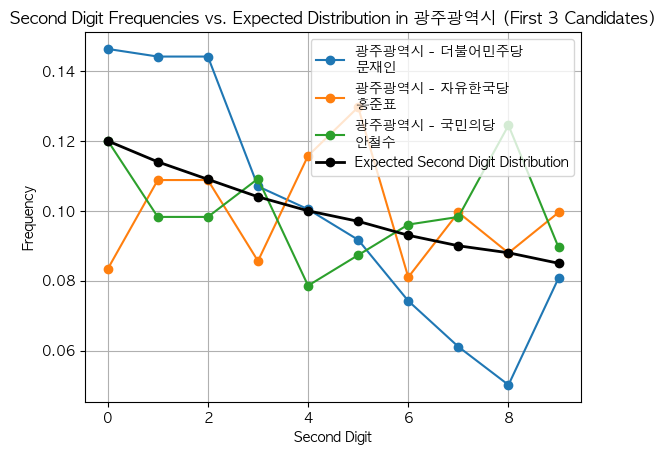

Digit Frequencies for 대전광역시 - 더불어민주당
문재인: [0.13333333 0.14712644 0.08735632 0.08965517 0.08045977 0.08505747
 0.08275862 0.09195402 0.11494253 0.08735632]
Digit Frequencies for 대전광역시 - 자유한국당
홍준표: [0.09885057 0.09195402 0.07586207 0.08965517 0.10344828 0.12413793
 0.12183908 0.11494253 0.08735632 0.09195402]
Digit Frequencies for 대전광역시 - 국민의당
안철수: [0.12183908 0.10344828 0.08045977 0.14022989 0.12413793 0.10574713
 0.07586207 0.08045977 0.07816092 0.08965517]


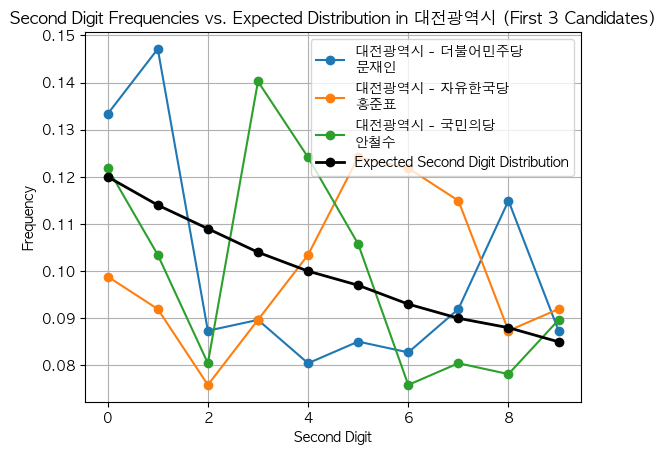

Digit Frequencies for 울산광역시 - 더불어민주당
문재인: [0.12951807 0.11445783 0.11144578 0.09638554 0.09939759 0.0873494
 0.09638554 0.10240964 0.06927711 0.09337349]
Digit Frequencies for 울산광역시 - 자유한국당
홍준표: [0.09939759 0.07831325 0.0753012  0.09337349 0.11746988 0.15060241
 0.09638554 0.10542169 0.0873494  0.09638554]
Digit Frequencies for 울산광역시 - 국민의당
안철수: [0.0753012  0.0873494  0.11144578 0.0873494  0.13554217 0.10843373
 0.08433735 0.10240964 0.12349398 0.08433735]


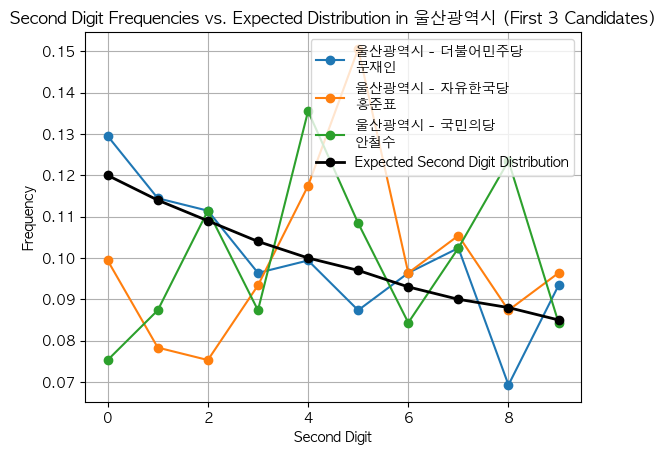

Digit Frequencies for 세종특별자치시 - 더불어민주당
문재인: [0.12658228 0.15189873 0.11392405 0.08860759 0.06329114 0.11392405
 0.05063291 0.12658228 0.08860759 0.07594937]
Digit Frequencies for 세종특별자치시 - 자유한국당
홍준표: [0.07594937 0.08860759 0.05063291 0.18987342 0.10126582 0.16455696
 0.03797468 0.12658228 0.06329114 0.10126582]
Digit Frequencies for 세종특별자치시 - 국민의당
안철수: [0.12658228 0.13924051 0.05063291 0.08860759 0.03797468 0.07594937
 0.11392405 0.13924051 0.16455696 0.06329114]


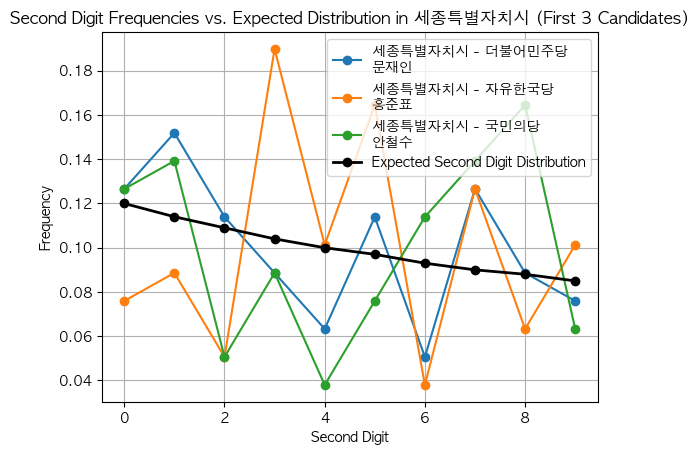

Digit Frequencies for 경기도 - 더불어민주당
문재인: [0.14620378 0.12813999 0.09681061 0.10922947 0.09229467 0.09596387
 0.08156929 0.08298052 0.08890771 0.07790008]
Digit Frequencies for 경기도 - 자유한국당
홍준표: [0.10584251 0.09935083 0.10047982 0.1021733  0.09963308 0.09765735
 0.09624612 0.10584251 0.09596387 0.09681061]
Digit Frequencies for 경기도 - 국민의당
안철수: [0.10160881 0.10781823 0.10584251 0.10386678 0.09427039 0.10330229
 0.09935083 0.09116568 0.09652837 0.09624612]


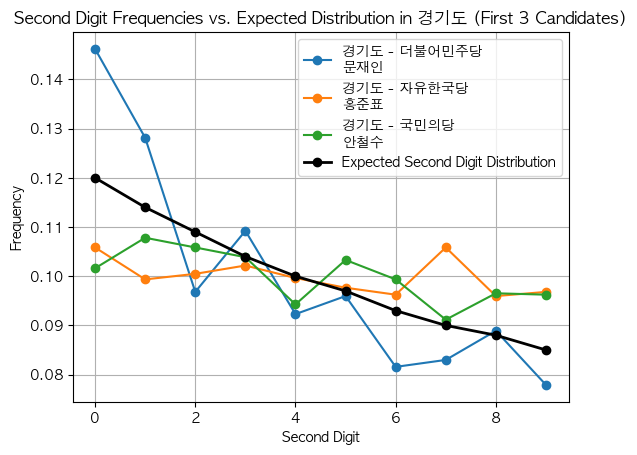

Digit Frequencies for 강원도 - 더불어민주당
문재인: [0.11438679 0.10849057 0.10495283 0.07429245 0.1120283  0.09669811
 0.09669811 0.10023585 0.10849057 0.08372642]
Digit Frequencies for 강원도 - 자유한국당
홍준표: [0.11320755 0.11438679 0.0990566  0.10259434 0.10495283 0.08490566
 0.11320755 0.08490566 0.08490566 0.09787736]
Digit Frequencies for 강원도 - 국민의당
안철수: [0.13105077 0.11688312 0.1038961  0.11924439 0.08264463 0.09563164
 0.09090909 0.09090909 0.09208973 0.07674144]


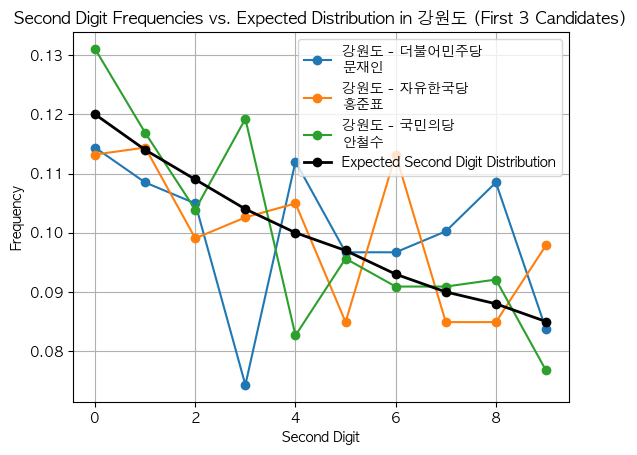

Digit Frequencies for 충청북도 - 더불어민주당
문재인: [0.12264151 0.10849057 0.11949686 0.11320755 0.07861635 0.08962264
 0.10534591 0.07704403 0.0927673  0.0927673 ]
Digit Frequencies for 충청북도 - 자유한국당
홍준표: [0.11163522 0.09748428 0.0990566  0.13207547 0.1163522  0.08962264
 0.09119497 0.09433962 0.06761006 0.10062893]
Digit Frequencies for 충청북도 - 국민의당
안철수: [0.08333333 0.10691824 0.10534591 0.13679245 0.11006289 0.08962264
 0.09119497 0.08333333 0.09433962 0.0990566 ]


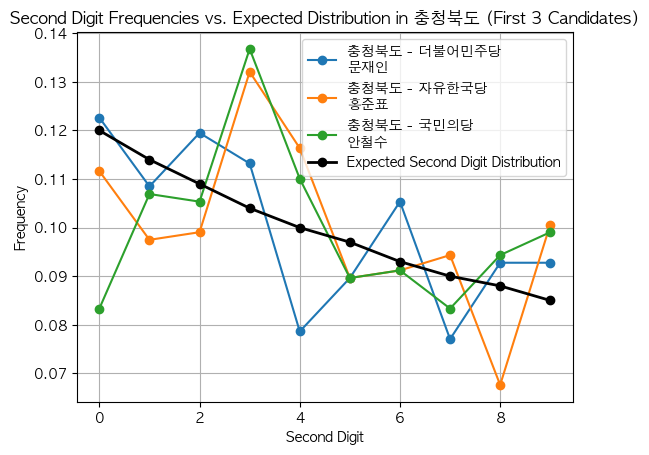

Digit Frequencies for 충청남도 - 더불어민주당
문재인: [0.12834225 0.10053476 0.10802139 0.11550802 0.0973262  0.09839572
 0.08663102 0.08983957 0.0802139  0.09518717]
Digit Frequencies for 충청남도 - 자유한국당
홍준표: [0.10245464 0.11099253 0.09178228 0.10565635 0.09178228 0.10565635
 0.0864461  0.11632871 0.09284952 0.09605123]
Digit Frequencies for 충청남도 - 국민의당
안철수: [0.12059765 0.11419424 0.09498399 0.10138741 0.10458911 0.09178228
 0.10032017 0.09605123 0.07897545 0.09711846]


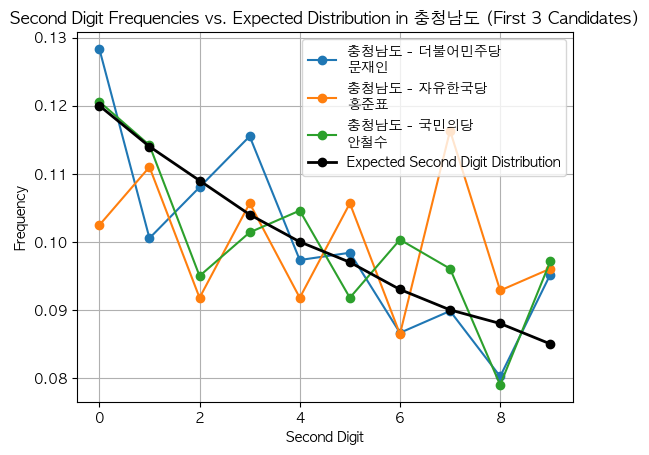

Digit Frequencies for 전라북도 - 더불어민주당
문재인: [0.1296729  0.12850467 0.1203271  0.10280374 0.09696262 0.09462617
 0.08995327 0.09345794 0.0771028  0.06658879]
Digit Frequencies for 전라북도 - 자유한국당
홍준표: [0.11801242 0.09813665 0.10062112 0.09689441 0.09813665 0.12049689
 0.08198758 0.09068323 0.0931677  0.10186335]
Digit Frequencies for 전라북도 - 국민의당
안철수: [0.09953162 0.1088993  0.10187354 0.10187354 0.11007026 0.08899297
 0.09953162 0.07962529 0.09953162 0.11007026]


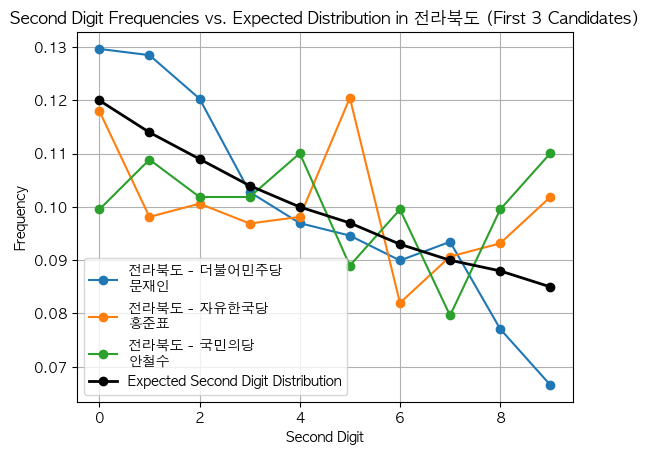

Digit Frequencies for 전라남도 - 더불어민주당
문재인: [0.09324209 0.10863986 0.12318221 0.09324209 0.10265184 0.09495295
 0.09666382 0.11377246 0.09067579 0.0829769 ]
Digit Frequencies for 전라남도 - 자유한국당
홍준표: [0.13348677 0.12082854 0.11047181 0.1150748  0.10356732 0.09321059
 0.10126582 0.07249712 0.07134638 0.07825086]
Digit Frequencies for 전라남도 - 국민의당
안철수: [0.11790017 0.09122203 0.10413081 0.10585198 0.09036145 0.11359725
 0.09208262 0.10499139 0.08347676 0.09638554]


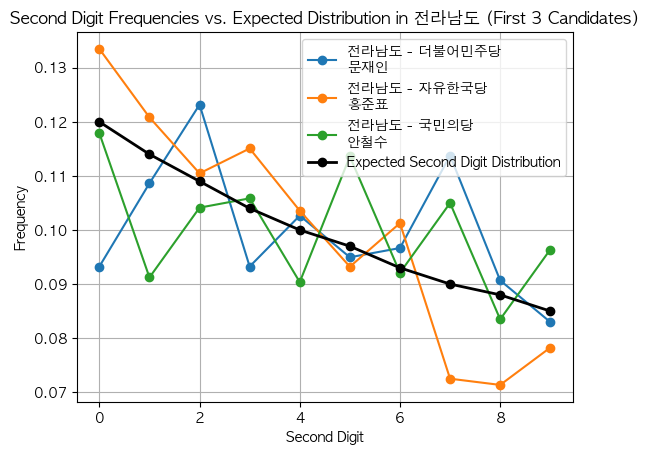

Digit Frequencies for 경상북도 - 더불어민주당
문재인: [0.14041893 0.12024825 0.10705974 0.08999224 0.10550815 0.08921645
 0.08378588 0.08533747 0.09154383 0.08688906]
Digit Frequencies for 경상북도 - 자유한국당
홍준표: [0.12645462 0.12024825 0.09542281 0.09775019 0.10318076 0.10240497
 0.08766486 0.09231963 0.08766486 0.08688906]
Digit Frequencies for 경상북도 - 국민의당
안철수: [0.13897516 0.09161491 0.10947205 0.10791925 0.10869565 0.0947205
 0.08773292 0.08074534 0.0931677  0.08695652]


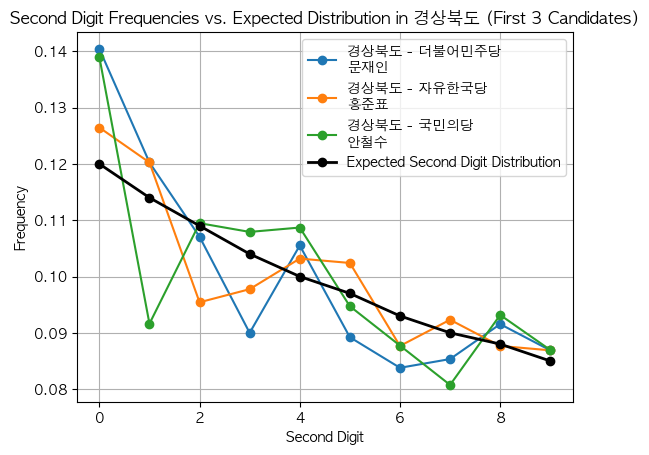

Digit Frequencies for 경상남도 - 더불어민주당
문재인: [0.12797375 0.11320755 0.11812961 0.09680066 0.07711239 0.1123872
 0.08039377 0.097621   0.09680066 0.07957342]
Digit Frequencies for 경상남도 - 자유한국당
홍준표: [0.1197703  0.12305168 0.09515997 0.10008203 0.09680066 0.08203445
 0.09269893 0.09598031 0.08613618 0.10828548]
Digit Frequencies for 경상남도 - 국민의당
안철수: [0.09794239 0.11111111 0.1127572  0.10699588 0.0962963  0.10041152
 0.09958848 0.09547325 0.08971193 0.08971193]


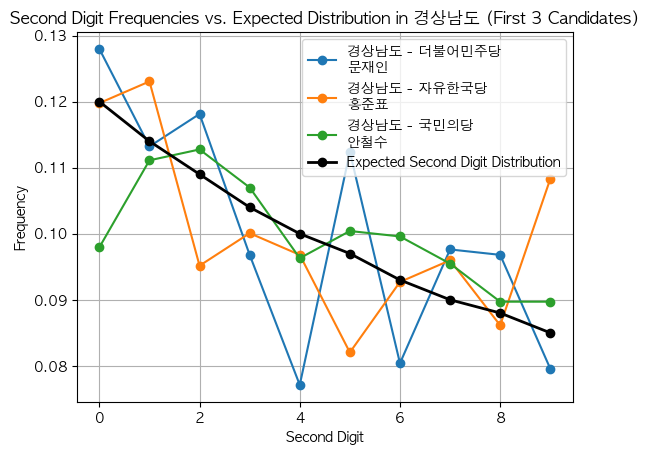

Digit Frequencies for 제주특별자치도 - 더불어민주당
문재인: [0.09191176 0.14705882 0.10294118 0.125      0.09191176 0.09191176
 0.08455882 0.08455882 0.10294118 0.07720588]
Digit Frequencies for 제주특별자치도 - 자유한국당
홍준표: [0.11355311 0.0989011  0.13919414 0.11355311 0.11355311 0.09157509
 0.09157509 0.06959707 0.08791209 0.08058608]
Digit Frequencies for 제주특별자치도 - 국민의당
안철수: [0.11721612 0.12454212 0.1025641  0.13186813 0.05860806 0.12087912
 0.09157509 0.08058608 0.08424908 0.08791209]


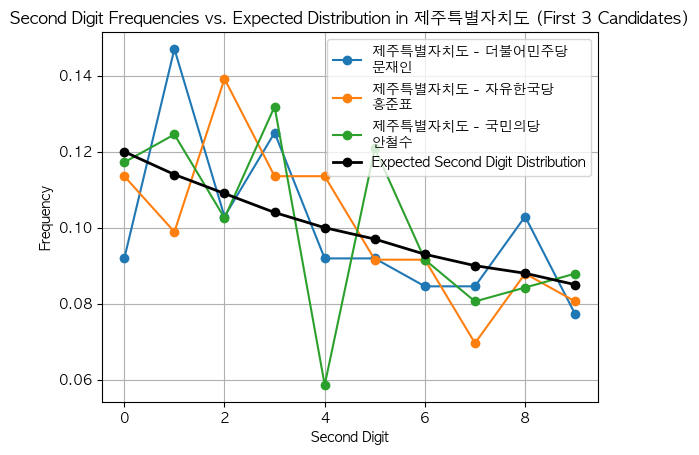

In [9]:
# Redefine plotting with only the first three candidates
plt.figure(figsize=(15, 10))

# Group data by '시도' (province) and plot the second digit frequency for the first three candidates
for province in data_without_columns['시도명'].unique():
    province_data = data_without_columns[data_without_columns['시도명'] == province]

    # Plotting the second digit frequency for the first three candidates in the province
    for column in data_without_columns.columns[1:4]:  # Only the first three candidates
        frequencies = second_digit_frequencies(province_data[column])
        plt.plot(range(0, 10), frequencies, '-o', label=f"{province} - {column}")

        # Print the frequencies for each digit for the current candidate
        print(f"Digit Frequencies for {province} - {column}: {frequencies}")

    # Plotting the expected distribution for comparison
    plt.plot(range(0, 10), second_digit_distribution, '-o', label='Expected Second Digit Distribution', color='black', linewidth=2)

    # Adding labels and title to the plot
    plt.xlabel('Second Digit')
    plt.ylabel('Frequency')
    plt.title(f'Second Digit Frequencies vs. Expected Distribution in {province} (First 3 Candidates)')
    plt.legend()
    plt.grid(True)
    plt.show()  # Show the plot for each province



## Total에 대한 First digit 관찰

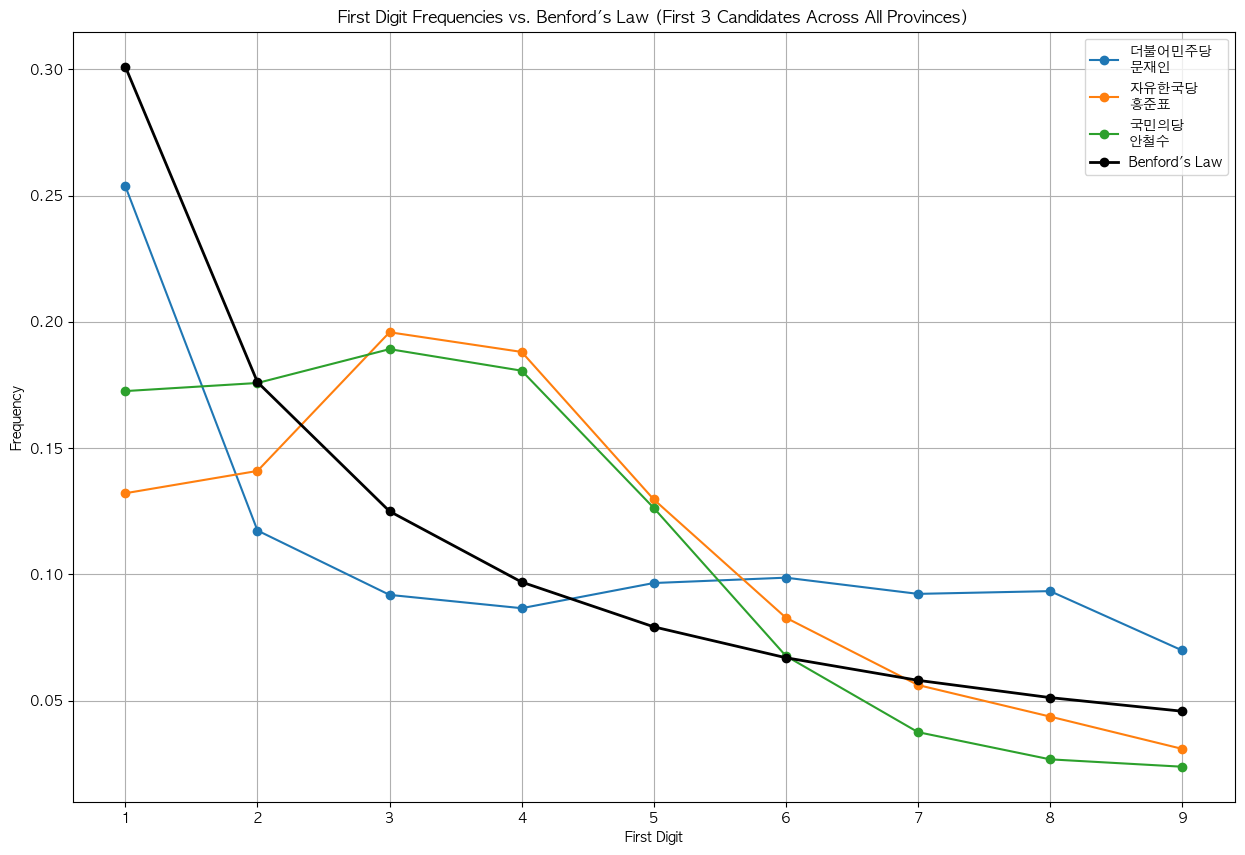

First Digit Frequencies for 더불어민주당
문재인:
Digit 1: 0.2537
Digit 2: 0.1173
Digit 3: 0.0918
Digit 4: 0.0866
Digit 5: 0.0965
Digit 6: 0.0987
Digit 7: 0.0922
Digit 8: 0.0933
Digit 9: 0.0698


First Digit Frequencies for 자유한국당
홍준표:
Digit 1: 0.1321
Digit 2: 0.1409
Digit 3: 0.1959
Digit 4: 0.1881
Digit 5: 0.1296
Digit 6: 0.0828
Digit 7: 0.0561
Digit 8: 0.0436
Digit 9: 0.0308


First Digit Frequencies for 국민의당
안철수:
Digit 1: 0.1726
Digit 2: 0.1758
Digit 3: 0.1892
Digit 4: 0.1806
Digit 5: 0.1263
Digit 6: 0.0677
Digit 7: 0.0375
Digit 8: 0.0267
Digit 9: 0.0238




In [10]:
# Function to calculate the first digit frequency
def first_digit_frequencies(numbers):
    frequencies = np.zeros(9)  # Array to hold frequencies for digits 1 through 9
    for number in numbers:
        if number > 0:
            first_digit = int(str(number)[0])  # Extract the first digit
            frequencies[first_digit - 1] += 1
    return frequencies / sum(frequencies)  # Normalize the frequencies

# Calculate the Benford distribution
benford_distribution = [np.log10(1 + 1/d) for d in range(1, 10)]

# Redefine plotting for each candidate across all provinces
plt.figure(figsize=(15, 10))

# Plotting the first digit frequency for each of the first three candidates across all provinces
for column in data_without_columns.columns[1:4]:  # Only the first three candidates
    frequencies = first_digit_frequencies(data_without_columns[column])
    plt.plot(range(1, 10), frequencies, '-o', label=column)

# Plotting the Benford distribution for comparison
plt.plot(range(1, 10), benford_distribution, '-o', label='Benford\'s Law', color='black', linewidth=2)

# Adding labels and title to the plot
plt.xlabel('First Digit')
plt.ylabel('Frequency')
plt.title('First Digit Frequencies vs. Benford\'s Law (First 3 Candidates Across All Provinces)')
plt.legend()
plt.grid(True)
plt.show()  # Show the plot for all provinces combined

# Calculating the first digit frequencies for each of the first three candidates
first_digit_freqs_candidates = [first_digit_frequencies(data_without_columns[column]) for column in data_without_columns.columns[1:4]]

# Candidate names for reference
candidate_names = data_without_columns.columns[1:4]

# Printing the first digit frequencies for each candidate
for i, candidate in enumerate(candidate_names):
    print(f"First Digit Frequencies for {candidate}:")
    for digit in range(1, 10):
        print(f"Digit {digit}: {first_digit_freqs_candidates[i][digit-1]:.4f}")
    print("\n")  # Add a newline for better readability between candidates




### Total First digit에 대해 Chi-square 검정

임계값이 16.9 인데에 반해 7441, 3179 는 너무 크다는 판단.

First digit을 쓰는게 맞을끼..? -> Mebane의 논문 및 방법론 -> Second digit 보는게 맞다는 결론

In [11]:
import numpy as np
import scipy.stats as stats

# Benford's Law expected frequencies
def benfords_law(d):
    return np.log10(1 + 1/d)

expected_frequencies = [benfords_law(d) for d in range(1, 10)]

# Observed frequencies for 더불어민주당 (이재명) and 국민의힘 (윤석열)
observed_frequencies_박근혜 = [0.6257, 0.1103, 0.0357, 0.0290, 0.0284, 0.0302, 0.0366, 0.0475, 0.0566]
observed_frequencies_문재인 = [0.5082, 0.1125, 0.0602, 0.0575, 0.0506, 0.0490, 0.0512, 0.0520, 0.0588]

# Calculate chi-square statistic for 이재명 and 윤석열
chi_square_statistic_박근혜 = sum(((o - e)**2 / e for o, e in zip(observed_frequencies_박근혜*13542, expected_frequencies*13542)))
chi_square_statistic_문재인 = sum(((o - e)**2 / e for o, e in zip(observed_frequencies_문재인*13542, expected_frequencies*13542)))

# Degrees of freedom
df = 8  # 9 digits - 1

# Critical value at 5% significance level
critical_value = stats.chi2.ppf(0.95, df)

chi_square_statistic_박근혜, chi_square_statistic_문재인, critical_value, expected_frequencies


(7441.788136514415,
 3179.208543196775,
 15.50731305586545,
 [0.3010299956639812,
  0.17609125905568124,
  0.12493873660829993,
  0.09691001300805642,
  0.07918124604762482,
  0.06694678963061322,
  0.05799194697768673,
  0.05115252244738129,
  0.04575749056067514])

## Total 에서의 Second digit 관찰

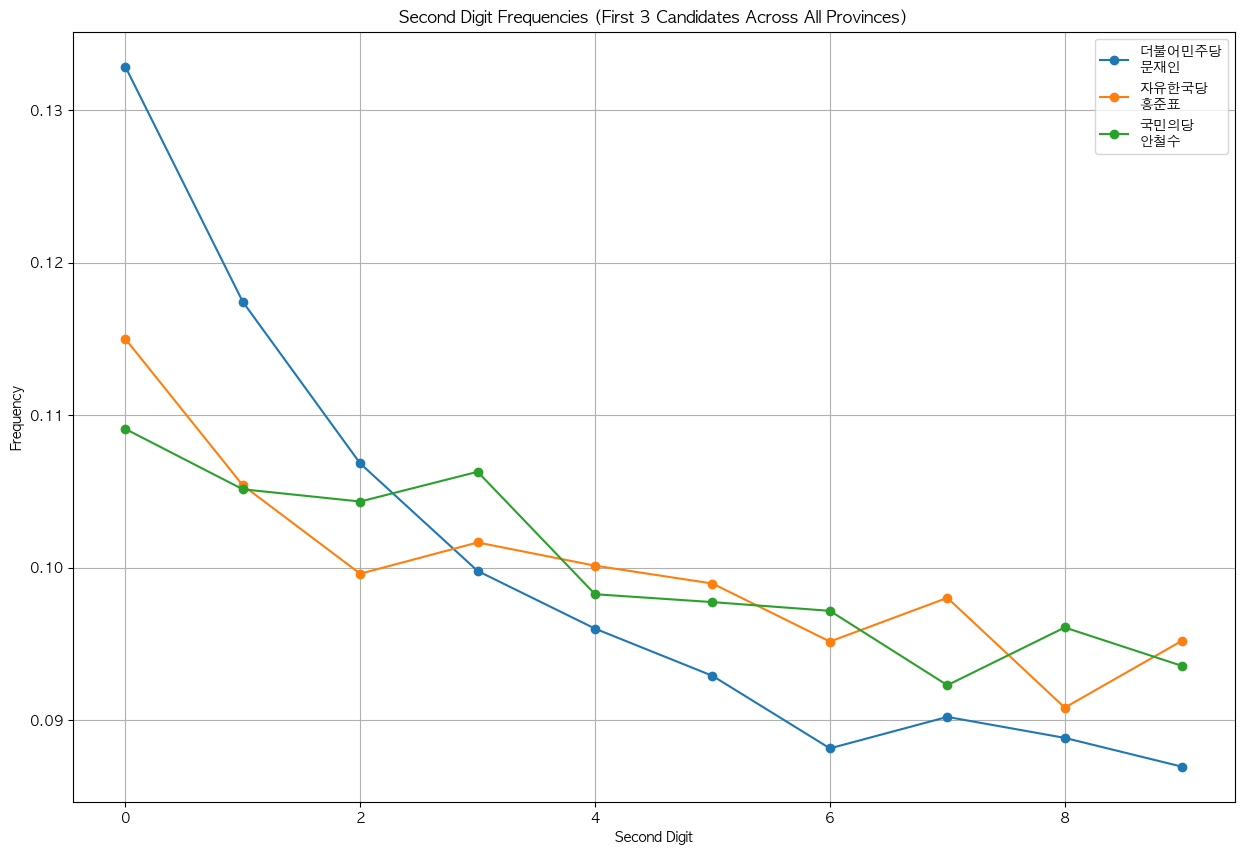

Second Digit Frequencies for 더불어민주당
문재인:
Digit 1: 0.1329
Digit 2: 0.1174
Digit 3: 0.1068
Digit 4: 0.0998
Digit 5: 0.0960
Digit 6: 0.0929
Digit 7: 0.0882
Digit 8: 0.0902
Digit 9: 0.0888
Digit 10: 0.0869


Second Digit Frequencies for 자유한국당
홍준표:
Digit 1: 0.1150
Digit 2: 0.1054
Digit 3: 0.0996
Digit 4: 0.1017
Digit 5: 0.1001
Digit 6: 0.0990
Digit 7: 0.0952
Digit 8: 0.0980
Digit 9: 0.0908
Digit 10: 0.0952


Second Digit Frequencies for 국민의당
안철수:
Digit 1: 0.1091
Digit 2: 0.1051
Digit 3: 0.1043
Digit 4: 0.1063
Digit 5: 0.0983
Digit 6: 0.0977
Digit 7: 0.0972
Digit 8: 0.0923
Digit 9: 0.0961
Digit 10: 0.0936




In [16]:
# Function to calculate the second digit frequency
def second_digit_frequencies(numbers):
    frequencies = np.zeros(10)  # Array to hold frequencies for digits 0 through 9
    for number in numbers:
        if number >= 10:
            second_digit = int(str(number)[1])  # Extract the second digit
            frequencies[second_digit] += 1
    return frequencies / sum(frequencies)  # Normalize the frequencies

# Redefine plotting for the second digit frequency of each candidate across all provinces
plt.figure(figsize=(15, 10))

# Plotting the second digit frequency for each of the first three candidates across all provinces
for column in data_without_columns.columns[1:4]:  # Only the first three candidates
    frequencies = second_digit_frequencies(data_without_columns[column])
    plt.plot(range(0, 10), frequencies, '-o', label=column)

# Adding labels and title to the plot
plt.xlabel('Second Digit')
plt.ylabel('Frequency')
plt.title('Second Digit Frequencies (First 3 Candidates Across All Provinces)')
plt.legend()
plt.grid(True)
plt.show()  # Show the plot for all provinces combined

# Calculating the first digit frequencies for each of the first three candidates
first_digit_freqs_candidates = [second_digit_frequencies(data_without_columns[column]) for column in data_without_columns.columns[1:4]]

# Candidate names for reference
candidate_names = data_without_columns.columns[1:4]

# Printing the first digit frequencies for each candidate
for i, candidate in enumerate(candidate_names):
    print(f"Second Digit Frequencies for {candidate}:")
    for digit in range(1, 11):
        print(f"Digit {digit}: {first_digit_freqs_candidates[i][digit-1]:.4f}")
    print("\n")  # Add a newline for better readability between candidates



### Total Second digit에 대한 Chi-square test

Second Digit Frequencies for 더불어민주당
문재인:
Digit 1: 0.1329
Digit 2: 0.1174
Digit 3: 0.1068
Digit 4: 0.0998
Digit 5: 0.0960
Digit 6: 0.0929
Digit 7: 0.0882
Digit 8: 0.0902
Digit 9: 0.0888
Digit 10: 0.0869


Second Digit Frequencies for 자유한국당
홍준표:
Digit 1: 0.1150
Digit 2: 0.1054
Digit 3: 0.0996
Digit 4: 0.1017
Digit 5: 0.1001
Digit 6: 0.0990
Digit 7: 0.0952
Digit 8: 0.0980
Digit 9: 0.0908
Digit 10: 0.0952

In [17]:
# Function to calculate Benford's Law expected frequencies for the second digit
def benfords_law_second_digit(d):
    return sum(np.log10(1 + 1/(10 * n + d)) for n in range(1, 10))

# Expected frequencies for the second digit according to Benford's Law
expected_frequencies_second_digit = [benfords_law_second_digit(d) for d in range(0, 10)]

# Observed frequencies for 더불어민주당 (박근혜) and 국민의힘 (문재인)
observed_frequencies_박근혜_second = [0.1329, 0.1174, 0.1068, 0.0998, 0.0960, 0.0929, 0.0882, 0.0902, 0.0888, 0.0869]
observed_frequencies_문재인_second = [0.1150, 0.1054, 0.0996, 0.1017, 0.1001, 0.0990, 0.0952, 0.0980, 0.0908, 0.0952]

# Calculate chi-square statistic for 박근혜 and 문재인
chi_square_statistic_박근혜_second = sum(((o - e)**2 / e for o, e in zip(observed_frequencies_박근혜_second*17454, expected_frequencies_second_digit*17454)))
chi_square_statistic_문재인_second = sum(((o - e)**2 / e for o, e in zip(observed_frequencies_문재인_second*17454, expected_frequencies_second_digit*17454)))

# Degrees of freedom for the second digit
df_second = 9  # 10 digits (0 to 9) - 1

# Critical value at 5% significance level
critical_value_second = stats.chi2.ppf(0.95, df_second)

chi_square_statistic_박근혜_second, chi_square_statistic_문재인_second, critical_value_second, expected_frequencies_second_digit


(43.327077860240884,
 65.39435056919153,
 16.918977604620448,
 [0.11967926859688076,
  0.1138901034075564,
  0.10882149900550823,
  0.10432956023095939,
  0.10030820226757937,
  0.09667723580232243,
  0.09337473578303615,
  0.09035198926960332,
  0.08757005357886138,
  0.08499735205769224])

### 위의 지역별 결과에 따른 second digit benford rule에 대한 chi-square 검정

각 지역별 결과를 저 array에 넣으면 됨.

지금은 부산-박근혜 데이터를 넣었는데, 임계값을 넘어서 Fraud 가능성이 있다고 보여짐.

충북-문재인 넣었을 때는 chi-square 값이 5.0 정도로 임계값 안넘었음.

In [190]:
# Function to calculate Benford's Law expected frequencies for the second digit
def benfords_law_second_digit(d):
    return sum(np.log10(1 + 1/(10 * n + d)) for n in range(1, 10))

# Expected frequencies for the second digit according to Benford's Law
expected_frequencies_second_digit = [benfords_law_second_digit(d) for d in range(0, 10)]

observed_frequencies_문재인_second1 = [0.09183673, 0.10544218, 0.10204082, 0.07993197, 0.09013605, 0.1122449, 0.07993197, 0.09693878, 0.11054422, 0.13095238]
chi_square_statistic_문재인_second1 = sum(((o - e)**2 / e for o, e in zip(observed_frequencies_문재인_second1*877, expected_frequencies_second_digit*877)))

# Degrees of freedom for the second digit
df_second = 9  # 10 digits (0 to 9) - 1

# Critical value at 5% significance level
critical_value_second = stats.chi2.ppf(0.95, df_second)

chi_square_statistic_문재인_second1, critical_value_second


(43.90202282522562, 16.918977604620448)

### third

If the test about third digit rejects our hypothesis, it has some probability of fraud 


/var/folders/8l/d0_bj06x2czf46y6_p5zswgr0000gn/T/ipykernel_31269/1300540608.py:8: RuntimeWarning: invalid value encountered in true_divide
  return frequencies / sum(frequencies)  # Normalize the frequencies


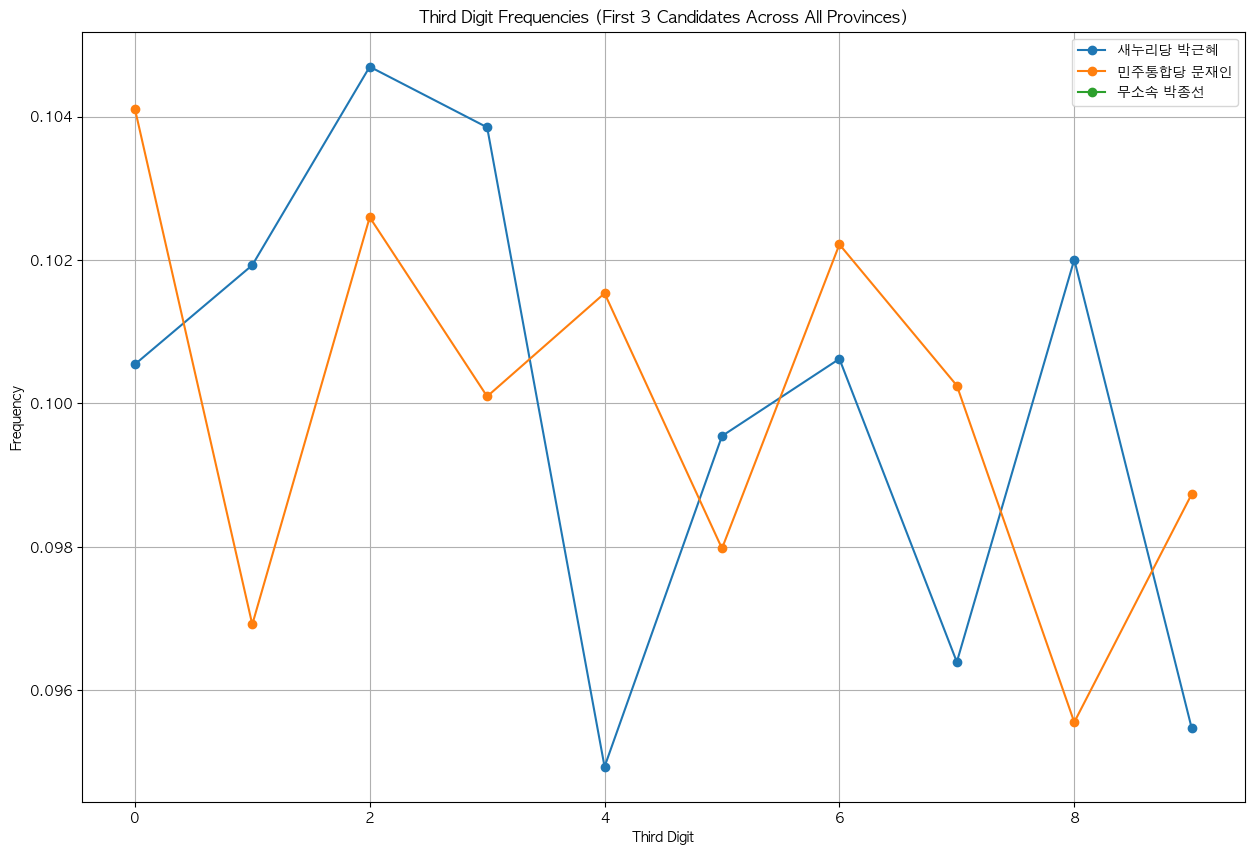

In [191]:
# Function to calculate the third digit frequency
def third_digit_frequencies(numbers):
    frequencies = np.zeros(10)  # Array to hold frequencies for digits 0 through 9
    for number in numbers:
        if number >= 100:
            third_digit = int(str(number)[2])  # Extract the third digit
            frequencies[third_digit] += 1
    return frequencies / sum(frequencies)  # Normalize the frequencies

# Redefine plotting for the third digit frequency of each candidate across all provinces
plt.figure(figsize=(15, 10))

# Plotting the third digit frequency for each of the first three candidates across all provinces
for column in data_without_columns.columns[1:4]:  # Only the first three candidates
    frequencies = third_digit_frequencies(data_without_columns[column])
    plt.plot(range(0, 10), frequencies, '-o', label=column)

# Adding labels and title to the plot
plt.xlabel('Third Digit')
plt.ylabel('Frequency')
plt.title('Third Digit Frequencies (First 3 Candidates Across All Provinces)')
plt.legend()
plt.grid(True)
plt.show()  # Show the plot for all provinces combined

